# **Data Science and Business Analytics Intern** 
# **At Sparks Foundation**
# **Vipul Shukla**
# **Task 6**
# **Prediction using Decision Tree Algorithm**
  ● **Create the Decision Tree classifier and visualize it graphically.**
  
  ● **The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly**

In [ ]:
%%html
<marquee style='width : 80%;'><h1 style='color:green ;'>Import Impotant Libraries</h1></marquee>

In [47]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.datasets import load_iris


In [48]:
%%html
<marquee style='width : 80%;'><h1 style='color:green ;'>Loading the Dataset</h1></marquee>

In [49]:
iris = load_iris()
dir(iris)


['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [50]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [51]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [52]:
# Forming the iris dataframe
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
%%html
<marquee style='width : 80%; br:1sec;'><h1 style='color:green ;'>Exploratory data analysis<br>
Here we will add the target cols in the df</h1></marquee>

In [54]:
# Here I have made a new columns for species
df['species']=iris['target']
df['species'] = df['species'].apply(lambda x: iris['target_names'][x])
df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [55]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [56]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [57]:
%%html
<marquee style='width : 80%;'><h1 style='color:green ;'>Comparision Bw the feature</h1></marquee>

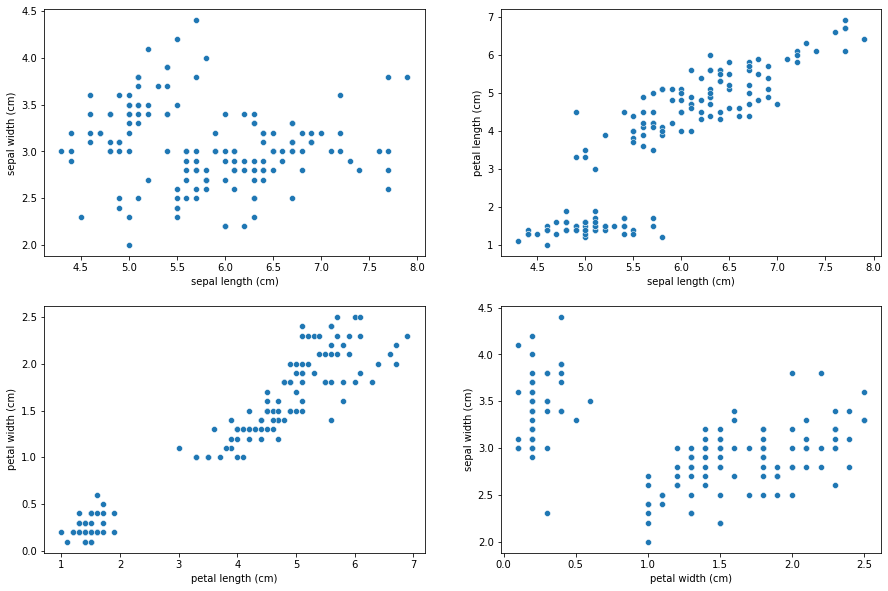

In [58]:
from warnings import filterwarnings
filterwarnings('ignore')
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(df['sepal length (cm)'],df['sepal width (cm)'])
plt.subplot(2,2,2)
sns.scatterplot(df['sepal length (cm)'],df['petal length (cm)'])
plt.subplot(2,2,3)
sns.scatterplot(df['petal length (cm)'],df['petal width (cm)'])
plt.subplot(2,2,4)
sns.scatterplot(df['petal width (cm)'],df['sepal width (cm)'])

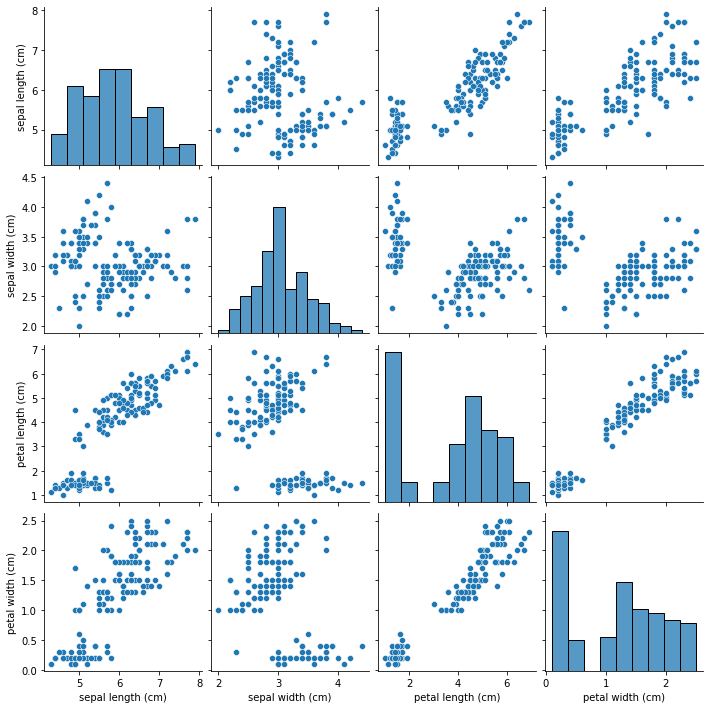

In [59]:
sns.pairplot(df)

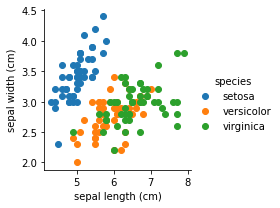

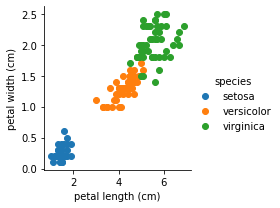

In [60]:
# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(df,hue='species').map(plt.scatter,'sepal length (cm)','sepal width (cm)').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(df,hue='species').map(plt.scatter,'petal length (cm)','petal width (cm)').add_legend()
plt.show()

In [61]:
%%html
<marquee style='width : 80%;'><h1 style='color:green ;'>Define X & Y</h1></marquee>

In [62]:
X = df.drop('species',axis=1)
Y = iris.target

In [63]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
%%html
<marquee style='width : 80%;'><h1 style='color:green ;'>Splitting the data</h1></marquee>

In [66]:
# Splitting the data with the help of train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X, Y,test_size=0.25,random_state=20)

In [67]:
%%html
<marquee style='width : 80%;'><h1 style='color:green ;'>Decision Tree Model Training</h1></marquee>

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = dt.fit(xtrain,ytrain)

In [69]:
pred = model.predict(xtest)
pred

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [70]:
xtest

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
47,4.6,3.2,1.4,0.2
73,6.1,2.8,4.7,1.2
74,6.4,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
67,5.8,2.7,4.1,1.0
89,5.5,2.5,4.0,1.3
143,6.8,3.2,5.9,2.3
21,5.1,3.7,1.5,0.4
108,6.7,2.5,5.8,1.8
12,4.8,3.0,1.4,0.1


In [71]:
df = pd.DataFrame({'Actual_value': ytest, 'Predicted_value': pred}) 
df

,Actual_value,Predicted_value
0,0,0
1,1,1
2,1,1
3,2,2
4,1,1
5,1,1
6,2,2
7,0,0
8,2,2
9,0,0


In [72]:
%%html
<marquee style='width : 80%;'><h1 style='color:green ;'>Visualizing the Trained Model</h1></marquee>

In [73]:

!pip install graphviz
!pip install dtreeviz

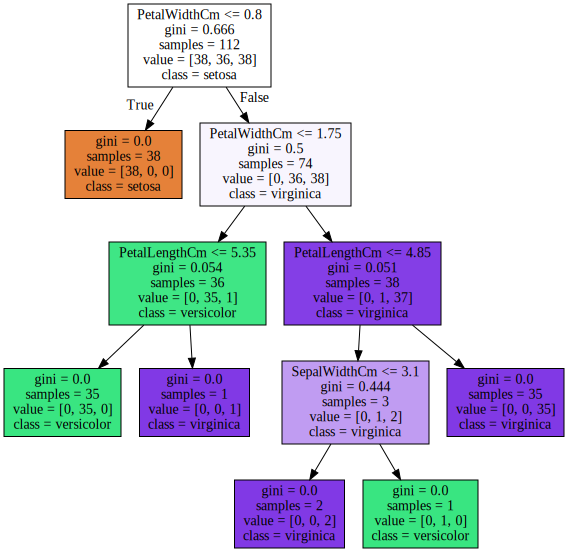

In [74]:
from dtreeviz.trees import dtreeviz # remember to load the package
# Importing libraries in Python
import sklearn.datasets as datasets
from sklearn import tree

iris=datasets.load_iris()
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                                class_names=['setosa','versicolor','virginica'],
                                filled=True)
import graphviz
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:

a=model.predict([[float(input('Sepal Length: ')), float(input('Sepal Width: ')), float(input('Petal Length: ')), float(input('Petal Width: '))]])
if a==[0]:
  print('setosa')
elif a==[1]:
  print('versicolor')
else:
  print('verginica')

In [ ]:
3.model.predict([[float(input('Petal Length: ')), float(input('Petal Width: ')), float(input('Sepal Length: ')), float(input('Sepal Width: '))]])


In [ ]:
%%html
<marquee style='width : 80%;'><h1 style='color:green ;'>Calculating the Model accuracy</h1></marquee>

In [ ]:
# Model Accuracy
print("Accuracy:",sm.accuracy_score(ytest, pred))

In [ ]:
model.score(xtest,pred)